[![GitHub issues by-label](https://img.shields.io/github/issues-raw/pfebrer96/sisl/GeometryPlot?style=for-the-badge)](https://github.com/pfebrer96/sisl/labels/GeometryPlot)

    
    
GeometryPlot
=========

In [1]:
import sisl
import sisl.viz
import numpy as np

First of all, we will create a geometry to work with

In [2]:
geom = sisl.geom.graphene_nanoribbon(9)

`GeometryPlot` allows you to quickly visualize a geometry. You can create a `GeometryPlot` out of a geometry very easily:

In [3]:
# GeometryPlot is the default plot of a geometry, so one can just do
plot = geom.plot()

Now let's see what we got:

In [4]:
plot

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 10},
              '…

## Plotting in 3D, 2D and 1D

The 3D view is great, but for big geometries it can take some time to render. If we have a 2d material, a 2D view might be more practical instead. We can get it by specifying the axes that we want:

In [5]:
plot.update_settings(axes=[1,0])

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': '#ccc', 'coloraxis': 'colo…

In fact, we can use any arbitrary axis. The coordinates of the atoms will just get projected into them. Here we will use the direction `[0,1,2]` as our first axis and `z` as our second axis. Note that `0` is not equivalent to `x`, as `0` means "the first lattice vector", which might be different from `[1,0,0]`.

In [6]:
plot.update_settings(axes=[[0,1,2], "z"])

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': '#ccc', 'coloraxis': 'colo…

In fact, this can be quite useful for "1d" representations. In this kind of representations, the first axis displays the coordinates (or projected coordinates) and the second one is at your disposal to do whatever you want. The values of the second axis are controlled by the `dataaxis_1d` setting.

It can be an array that **explicitly sets the values**:

In [7]:
plot.update_settings(axes=[0], dataaxis_1d=plot.geometry.atoms.Z)

FigureWidget({
    'data': [{'marker': {'color': [grey, grey, grey, grey, grey, grey, grey, grey,
            …

Or a function that **accepts the projected coordinates and returns the values**.

In [8]:
plot.update_settings(dataaxis_1d=np.sin)

FigureWidget({
    'data': [{'marker': {'color': [grey, grey, grey, grey, grey, grey, grey, grey,
            …

But let's just go 2d for now :)

In [9]:
plot = plot.update_settings(axes=[1,0])

## Toggling bonds, atoms and cell

You might have noticed that, by default, the cell, atoms and bonds are displayed. Thanks to plotly's capabilities, **you can interactively toggle them by clicking at the names in the legend**, which is great!

However, if you want to make sure they are not displayed in the first place, you can set the `show_bonds`, `show_cell` and `show_atoms` settings to `False`.

In [10]:
plot.update_settings(show_cell=False, show_atoms=False)

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': '#ccc', 'coloraxis': 'colo…

## Picking which atoms to display

The `atoms` setting of `GeometryPlot` allows you to pick which atoms to display. It accepts exactly the same possibilities as the `atoms` argument in `Geometry`'s methods.

Therefore, you can ask for certain indices:

In [11]:
plot.update_settings(atoms=[1,2,3,4,5], show_atoms=True, show_cell="axes")
#show_cell accepts "box", "axes" and False

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': '#ccc', 'coloraxis': 'colo…

or use sisl categories to filter the atoms, for example. 

We can use it to display only those atoms that have 3 neighbours:

In [12]:
plot.update_settings(atoms={"neighbours": 3}, show_cell="box")

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': '#ccc', 'coloraxis': 'colo…

Notice that when we picked particular atoms, only the bonds of those atoms are displayed. You can change this by using the `bind_bonds_to_ats` setting.

In [13]:
plot.update_settings(bind_bonds_to_ats=False)

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': '#ccc', 'coloraxis': 'colo…

In fact, when we set `show_atoms` to `False`, all that the plot does is to act as if `atoms=[]` and `bind_bonds_to_ats=False`.

## Setting custom colors and size for atoms.

It is quite common that you have an **atom-resolved property that you want to display**. With `GeometryPlot` this is extremely easy :)

We can provide arrays for the `atoms_color` and `atoms_size` settings.

In the case of `atoms_color` we can **provide the colors directly**:

In [14]:
# Let's color the atoms with orange and blue depending on their y position
colors = []
for x, y, z in plot.geometry.xyz:
    
    if y > 13:
        color = "orange"
    else:
        color = "blue"
    
    colors.append(color)


plot.update_settings(atoms_color=colors, atoms=None) # we set atoms to None to display all the atoms again 

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': '#ccc', 'coloraxis': 'colo…

or **provide an array of values that is mapped to colors** using a color scale that you can, of course, change (`atoms_colorscale` setting).

In [15]:
# Let's also color them using their y coordinate
y = plot.geometry.xyz[:,1]
plot.update_settings(atoms_color=y, atoms_colorscale="viridis")

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': '#ccc', 'coloraxis': 'colo…

Since "orange" size doesn't make sense, the `atoms_size` array only accepts values.

In [16]:
# We will determine their size using the x coordinate
x = plot.geometry.xyz[:, 0] 

plot.update_settings(atoms_size=x*10) # we multiply it by 10 because otherwise the size is too small

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': '#ccc', 'coloraxis': 'colo…

Note that everything that we've done up to this moment is perfectly valid for the 3d view, we are just using the 2d view for convenience.

In [17]:
plot.update_settings(axes=[0,1,2])

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 10},
              '…

Guess why do we have a giant multicolor ball? :)

That's right! Atom sizes are too big!

In [18]:
plot.update_settings(atoms_size=x/4)

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 10},
              '…

Much better!

We hope you enjoyed what you learned!

-----
This next cell is just to create the thumbnail for the notebook in the docs 

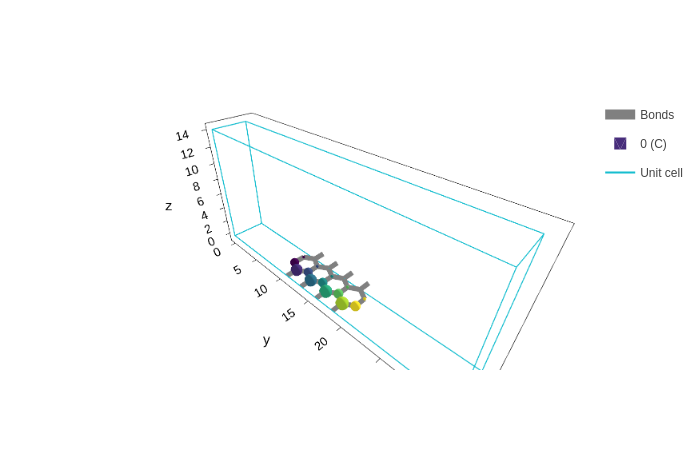

In [19]:
thumbnail_plot = plot

if thumbnail_plot:
    thumbnail_plot.show("png")

-------------